In [ ]:
# http://bogotobogo.com/python/scikit-learn/scikit_machine_learning_Data_Preprocessing-III-nonlinear-mappings-via-kernel-principal-component-analysis.php

Populating the interactive namespace from numpy and matplotlib


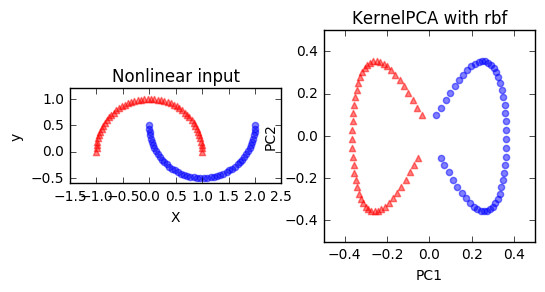

In [2]:
%pylab inline

from sklearn import cluster, datasets
from sklearn.datasets.samples_generator import make_blobs
from sklearn.decomposition import KernelPCA

#ccreate data : two moons
X, y = datasets.make_moons(n_samples=100, random_state=123)

# input
figure()
subplot(1, 2, 1, aspect='equal')
title("Nonlinear input")
scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=0.5)
scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o', alpha=0.5)
xlabel('X')
ylabel('y')

# Kernel PCA
kpca = KernelPCA(n_components=2, kernel="rbf", gamma=15)
X_kpca = kpca.fit_transform(X)
subplot(1, 2, 2, aspect='equal')
title("KernelPCA with rbf")
scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1],
            color='red', marker='^', alpha=0.5)
scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1],
            color='blue', marker='o', alpha=0.5)
xlabel('PC1')
ylabel('PC2')

show()

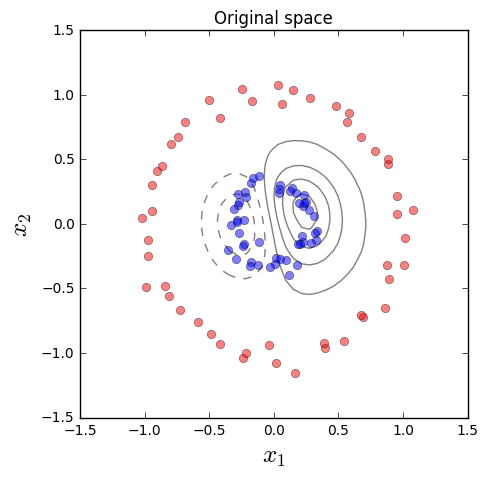

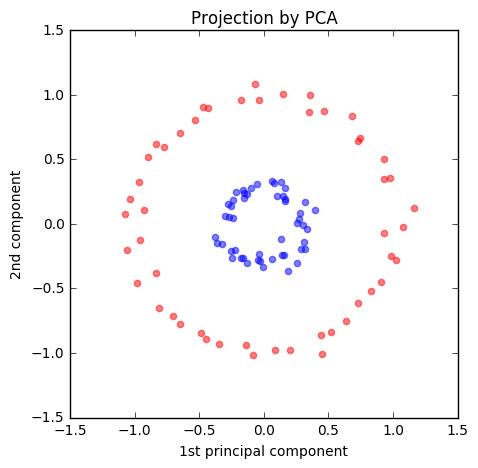

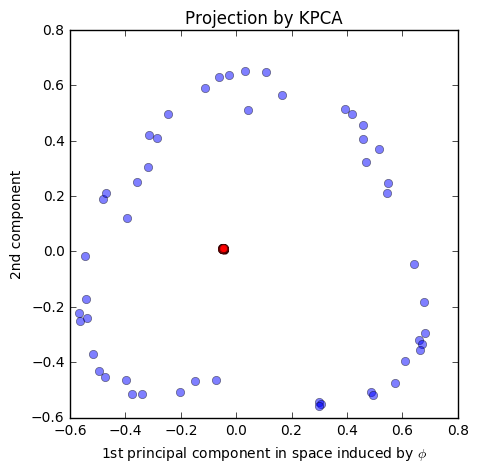

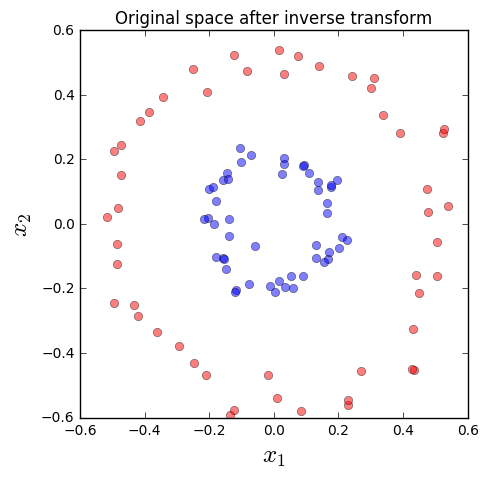

In [15]:
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

np.random.seed(0)

X, y = make_circles(n_samples=100, factor=.3, noise=.05)

kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=15)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA()
X_pca = pca.fit_transform(X)

# Plot results

figure(figsize=(5,5))
title("Original space")
reds = y == 0
blues = y == 1

plot(X[reds, 0], X[reds, 1], "ro", alpha=0.5)
plot(X[blues, 0], X[blues, 1], "bo", alpha=0.5)
xlabel("$x_1$", fontsize=18)
ylabel("$x_2$", fontsize=18)

X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5), np.linspace(-1.5, 1.5))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
# projection on the first principal component (in the phi space)
Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')

figure(figsize=(5,5))
scatter(X_pca[reds, 0], X_pca[reds, 1], color='red', marker='o', alpha=0.5)
scatter(X_pca[blues, 0], X_pca[blues, 1], color='blue', marker='o', alpha=0.5)
title("Projection by PCA")
xlabel("1st principal component")
ylabel("2nd component")

figure(figsize=(5,5))
plot(X_kpca[reds, 0], X_kpca[reds, 1], "ro", alpha=0.5)
plot(X_kpca[blues, 0], X_kpca[blues, 1], "bo", alpha=0.5)
title("Projection by KPCA")
xlabel("1st principal component in space induced by $\phi$")
ylabel("2nd component")

figure(figsize=(5,5)) 
plot(X_back[reds, 0], X_back[reds, 1], "ro", alpha=0.5)
plot(X_back[blues, 0], X_back[blues, 1], "bo", alpha=0.5)
title("Original space after inverse transform")
xlabel("$x_1$",fontsize=18)
ylabel("$x_2$", fontsize=18)

show()